In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Thêm đường dẫn src
sys.path.append(os.path.abspath('../src'))

# Import đầy đủ
from model import MLP
from layers import Dense
from activations import ReLU, Linear, Sigmoid # Import cả Sigmoid
from losses import MSE
from optimizer import SGD

# Cấu hình hiển thị
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6) # Mặc định kích thước biểu đồ

# Load dữ liệu đã xử lý từ Notebook 02
processed_dir = os.path.join('..', 'data', 'processed')
try:
    X_train = np.load(os.path.join(processed_dir, 'X_train.npy'))
    y_train = np.load(os.path.join(processed_dir, 'y_train.npy'))
    print(f"✅ Đã load dữ liệu: {len(X_train)} mẫu.")
except FileNotFoundError:
    print("❌ Chưa có dữ liệu!")

✅ Đã load dữ liệu: 16346 mẫu.


In [2]:
def run_experiment(name, hidden_layers=[64, 32], activation_cls=ReLU, learning_rate=0.001, batch_size=32, epochs=50):
    """
    Hàm chạy thí nghiệm tổng quát.
    - hidden_layers: List chứa số neuron các lớp ẩn (VD: [64, 32])
    - activation_cls: Class hàm kích hoạt (ReLU hoặc Sigmoid)
    """
    print(f"🧪 Running: {name} | Layers={hidden_layers} | Act={activation_cls.__name__} | LR={learning_rate} | Batch={batch_size}")
    
    # 1. Xây dựng Model
    model = MLP()
    n_features = X_train.shape[1]
    input_size = n_features
    
    # Tự động tạo các lớp ẩn dựa trên list hidden_layers
    for size in hidden_layers:
        model.add(Dense(input_size, size))
        model.add(activation_cls()) # Khởi tạo hàm kích hoạt
        input_size = size # Output lớp này là Input lớp sau
        
    # Lớp Output cuối cùng
    model.add(Dense(input_size, 1))
    model.add(Linear())
    
    # 2. Compile
    model.compile(loss_function=MSE(), optimizer=SGD(learning_rate=learning_rate))
    
    # 3. Training Loop
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        num_batches = 0
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            
            loss = model.train_step(x_batch, y_batch)
            epoch_loss += loss
            num_batches += 1
            
        losses.append(epoch_loss / num_batches)
        
    return losses

# Hàm vẽ biểu đồ chung
def plot_results(results, title):
    plt.figure()
    for name, history in results.items():
        plt.plot(history, label=name, linewidth=2)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.yscale('log') # Thang log để nhìn rõ sự khác biệt
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

🧪 Running: LR=0.01 | Layers=[64, 32] | Act=ReLU | LR=0.01 | Batch=32
🧪 Running: LR=0.001 | Layers=[64, 32] | Act=ReLU | LR=0.001 | Batch=32
🧪 Running: LR=0.0001 | Layers=[64, 32] | Act=ReLU | LR=0.0001 | Batch=32


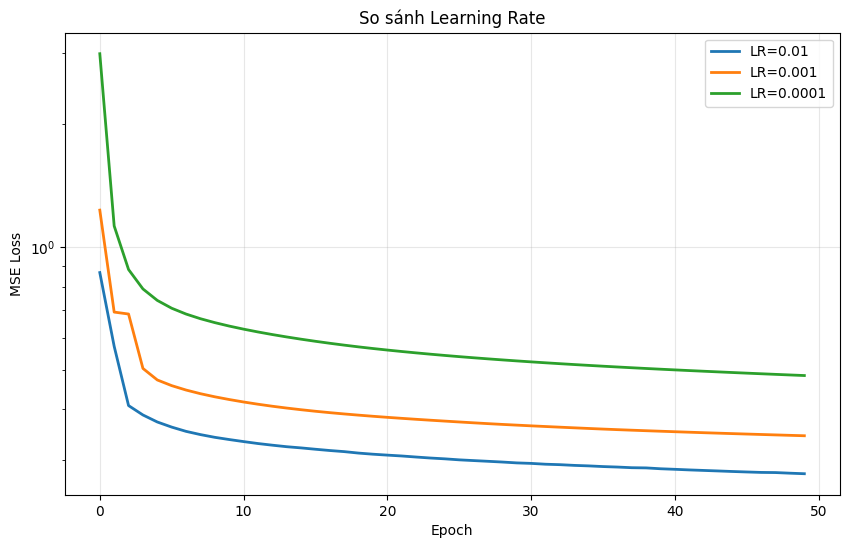

In [3]:
lrs = [0.01, 0.001, 0.0001]
results_lr = {}

for lr in lrs:
    name = f"LR={lr}"
    # Giữ cố định các tham số khác, chỉ thay đổi LR
    history = run_experiment(name, learning_rate=lr)
    results_lr[name] = history

plot_results(results_lr, "So sánh Learning Rate")

# --- KẾT LUẬN TẠM THỜI ---
# Nhìn biểu đồ, bạn hãy chọn LR tốt nhất để dùng cho các bài sau.
BEST_LR = 0.001

🧪 Running: ReLU | Layers=[64, 32] | Act=ReLU | LR=0.001 | Batch=32
🧪 Running: Sigmoid | Layers=[64, 32] | Act=Sigmoid | LR=0.001 | Batch=32


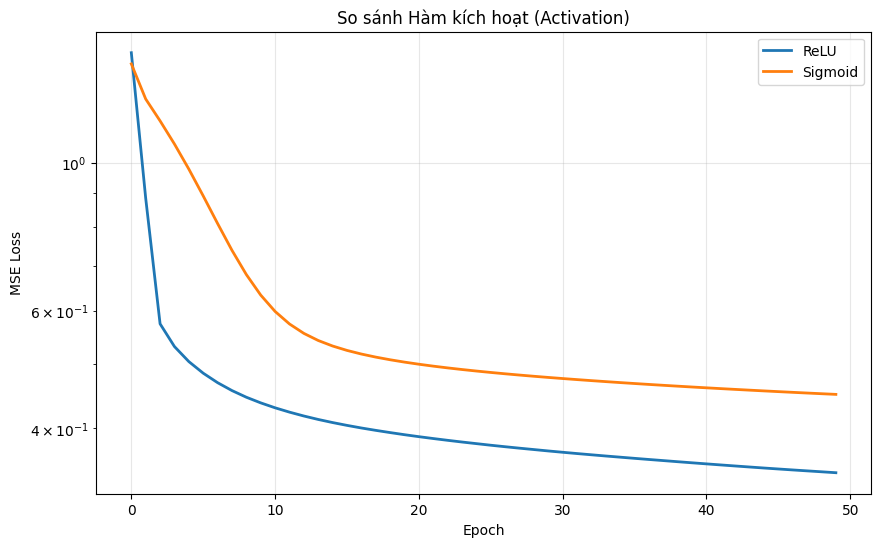

In [4]:
activations = [("ReLU", ReLU), ("Sigmoid", Sigmoid)]
results_act = {}

for name, act_cls in activations:
    # Dùng BEST_LR vừa tìm được
    history = run_experiment(name, activation_cls=act_cls, learning_rate=BEST_LR)
    results_act[name] = history

plot_results(results_act, "So sánh Hàm kích hoạt (Activation)")

🧪 Running: 1 Layer [64] | Layers=[64] | Act=ReLU | LR=0.001 | Batch=32
🧪 Running: 2 Layers [64, 32] | Layers=[64, 32] | Act=ReLU | LR=0.001 | Batch=32
🧪 Running: 3 Layers [64, 32, 16] | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=32


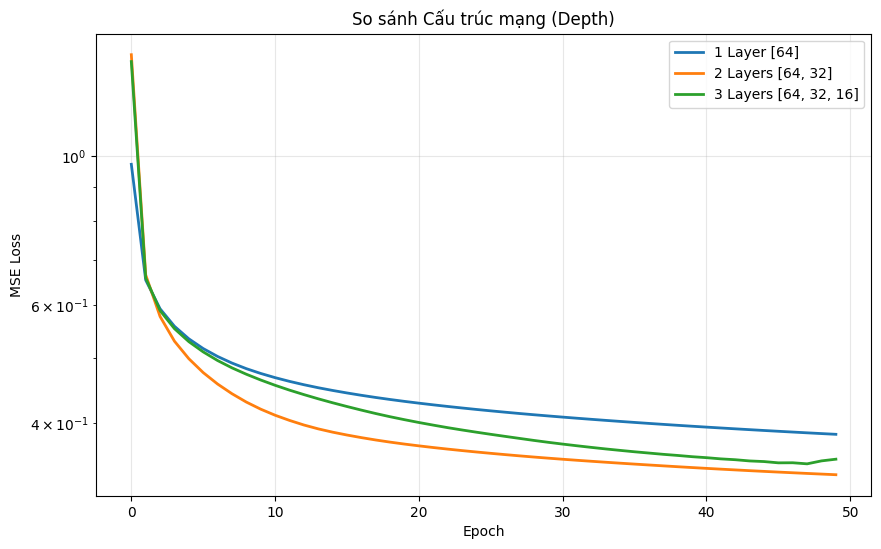

In [5]:
structures = [
    ("1 Layer [64]", [64]),
    ("2 Layers [64, 32]", [64, 32]),
    ("3 Layers [64, 32, 16]", [64, 32, 16])
]
results_depth = {}

for name, layers in structures:
    # Dùng BEST_LR và ReLU (vì ReLU đã thắng ở bài trước)
    history = run_experiment(name, hidden_layers=layers, activation_cls=ReLU, learning_rate=BEST_LR)
    results_depth[name] = history

plot_results(results_depth, "So sánh Cấu trúc mạng (Depth)")


--- 🧪 CHẠY KỊCH BẢN 4: BATCH SIZE ---
🧪 Running: Batch Size 16 | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=16
🧪 Running: Batch Size 32 | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=32
🧪 Running: Batch Size 64 | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=64
🧪 Running: Batch Size 128 | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=128


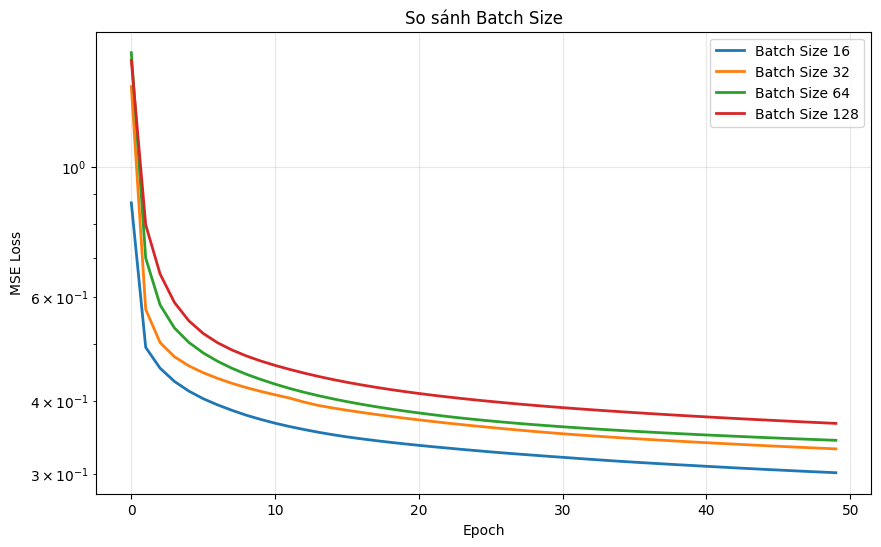

In [7]:
# [CELL TIẾP THEO] - Kịch bản 4: So sánh Batch Size
print("\n--- 🧪 CHẠY KỊCH BẢN 4: BATCH SIZE ---")

# Thử nghiệm các kích thước lô khác nhau
batch_sizes = [16, 32, 64, 128]
results_batch = {}

for bs in batch_sizes:
    name = f"Batch Size {bs}"
    
    # QUAN TRỌNG: 
    # 1. Dùng cấu trúc 3 lớp [64, 32, 16] (Vì nó vừa thắng ở Kịch bản 3)
    # 2. Dùng LR=0.001 (Vì nó thắng ở Kịch bản 1)
    history = run_experiment(
        name=name, 
        hidden_layers=[64, 32, 16], # <--- Đã cập nhật lên 3 lớp
        activation_cls=ReLU,        # <--- Giữ nguyên ReLU
        learning_rate=0.001,        # <--- Giữ nguyên 0.001
        batch_size=bs,              # <--- Thay đổi Batch Size
        epochs=50
    )
    results_batch[name] = history

# Vẽ biểu đồ
plot_results(results_batch, "So sánh Batch Size")